In [175]:
%matplotlib inline
from .char.delay_char import DlyLineDlog
import sys
import os
import numpy as np
import pandas as pd
import matplotlib
from collections import Counter

In [176]:
def data2df(lot_num, temp):
    dly = DlyLineDlog(os.path.join(".\\data\\Delay_line\\", lot_num, temp, "summary_" + temp + '.txt'), temp, lot_num)
    df_lst = dly.gen_df_lst()
    return pd.DataFrame(df_lst)

lotnum = "RC01927M"
temp = '25C'
df = data2df(lotnum, temp)
df = df.append(data2df(lotnum, '105C'))
df = df.append(data2df(lotnum, '-5C'))
lotnum = "RC01928M"
df = df.append(data2df(lotnum, '25C'))
df = df.append(data2df(lotnum, '105C'))
df = df.append(data2df(lotnum, '-5C'))

lotnum = "RC01929M"
df = df.append(data2df(lotnum, '25C'))
df = df.append(data2df(lotnum, '105C'))
df = df.append(data2df(lotnum, '-5C'))

df.columns = ['Lot', 'Temp', 'Dev#', 'VDD', 'Test', 'Data0', 'Data1']

In [177]:
# def slice_unit(dev_num, lot_num, temp='all', data_frame=df):
#     if isinstance(dev_num, list):
#         for x in dev_num:
#             if temp == 'all':
#                 data_sliced = data_frame.loc[(data_frame.Lot != lot_num) | (data_frame['Dev#'] != x)]
#             else:
#                 data_sliced = data_frame[(data_frame.Lot != lot_num) | (data_frame.Temp != temp) | (data_frame['Dev#'] != x)]
#     else:
#         if temp == 'all':
#             data_sliced = data_frame.loc[(data_frame.Lot != lot_num) | (data_frame['Dev#'] != dev_num)]
#         else:
#             data_sliced = data_frame[(data_frame.Lot != lot_num) | (data_frame.Temp != temp) | (data_frame['Dev#'] != dev_num)]
#             print(data_frame[(data_frame.Lot == lot_num) & (data_frame.Temp == temp) & (data_frame['Dev#'] == dev_num)])
#             print(data_sliced[(data_frame.Lot == lot_num) & (data_frame.Temp == temp) & (data_frame['Dev#'] == dev_num)])
#     del data_frame
#     return data_sliced

In [178]:
df = df[(df.Lot != 'RC01928M') | (df['Dev#'] != 20) | (df.Temp != '25C')]
df = df[(df.Lot != 'RC01928M') | (df['Dev#'] != 26) | (df.Temp != '25C')]
df = df[(df.Lot != 'RC01928M') | (df['Dev#'] != 21) | (df.Temp != '105C')]

df = df[(df.Lot != 'RC01927M') | (df['Dev#'] != 4) | (df.Temp != '25C')]
df = df[(df.Lot != 'RC01927M') | (df['Dev#'] != 3) | (df.Temp != '25C')]
df = df[(df.Lot != 'RC01927M') | (df['Dev#'] != 17) | (df.Temp != '25C')]
df = df[(df.Lot != 'RC01927M') | (df['Dev#'] != 3) | (df.Temp != '105C')]
df = df[(df.Lot != 'RC01927M') | (df['Dev#'] != 16) | (df.Temp != '105C')]
df = df[(df.Lot != 'RC01927M') | (df['Dev#'] != 4) | (df.Temp != '-5C')]
df = df[(df.Lot != 'RC01927M') | (df['Dev#'] != 5) | (df.Temp != '-5C')]
df = df[(df.Lot != 'RC01927M') | (df['Dev#'] != 6) | (df.Temp != '-5C')]
df = df[(df.Lot != 'RC01927M') | (df['Dev#'] != 19) | (df.Temp != '-5C')]

df = df[(df.Lot != 'RC01929M') | (df['Dev#'] != 20) | (df.Temp != '25C')]
df = df[(df.Lot != 'RC01929M') | (df['Dev#'] != 21) | (df.Temp != '25C')]
df = df[(df.Lot != 'RC01929M') | (df['Dev#'] != 25) | (df.Temp != '25C')]
df = df[(df.Lot != 'RC01929M') | (df['Dev#'] != 20) | (df.Temp != '105C')]
df = df[(df.Lot != 'RC01929M') | (df['Dev#'] != 21) | (df.Temp != '105C')]
df = df[(df.Lot != 'RC01929M') | (df['Dev#'] != 25) | (df.Temp != '105C')]

df = df[(df.Lot != 'RC01928M') | (df['Dev#'] != 9)]
df = df[(df.Lot != 'RC01929M') | (df['Dev#'] != 9)]
# df = df[(df.Lot != 'RC01929M') | (df['Dev#'] != 17)]
df = df[(df.Lot != 'RC01928M') | (df['Dev#'] != 14)]
df = df[(df.Lot != 'RC01927M') | (df['Dev#'] != 2)]
df = df[(df.Lot != 'RC01928M') | (df['Dev#'] != 15)]
df = df[(df.Lot != 'RC01929M') | (df['Dev#'] != 24)]


# slice_unit([20, 26], 'RC01928M', '25C')
# df = slice_unit(21, 'RC01928M', '105C')
# df = slice_unit(4, 'RC01927M', '25C')
# df = slice_unit([20, 21, 25], 'RC01929M', '25C')
# df = slice_unit([20, 21, 25], 'RC01929M', '105C')
# df = slice_unit(9, 'RC01928M')

In [179]:
def confirm_units(lot_num):
    units = len(Counter(df[(df.Lot == lot_num) & (df.Temp == '25C')]['Dev#']).keys())
    if ((units == len(Counter(df[(df.Lot == lot_num) & (df.Temp == '105C')]['Dev#']).keys())) and 
        (units == len(Counter(df[(df.Lot == lot_num) & (df.Temp == '-5C')]['Dev#']).keys()))):
        print("Lot " + lot_num + " has " + str(units))
    else:
        print("Units Number not Match")

confirm_units('RC01927M')
confirm_units('RC01928M')
confirm_units('RC01929M')

Lot RC01927M has 21
Lot RC01928M has 20
Lot RC01929M has 20


In [180]:
df.loc[df.Test == 'Delay', 'Data1'] = df[df.Test == 'Delay'].Data1.astype(int)

In [181]:
df[(df.Test == 'IDD') & (df.Data1 == 'STATIC')].Data0.describe()

count    1830.000000
mean        3.822418
std         0.158090
min         3.452000
25%         3.704000
50%         3.812000
75%         3.938000
max         4.239000
Name: Data0, dtype: float64

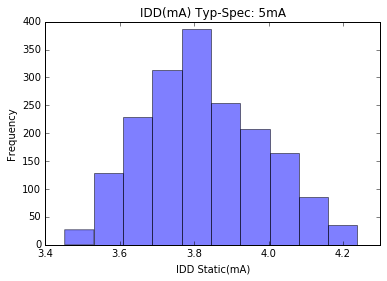

In [182]:
plt_idd_stat = df[(df.Test == 'IDD') & (df.Data1 == 'STATIC')].Data0.plot(kind='hist', alpha=0.5, title='IDD(mA) Typ-Spec: 5mA')
plt_idd_stat.set_xlabel("IDD Static(mA)")
plt_idd_stat.set_ylabel("Frequency")
plt_idd_stat.get_figure().savefig('idd.png')

In [183]:
df.loc[df.Test == 'Delay', 'Dly'] = df[df.Test == 'Delay'].apply(lambda x: (x['Data0'] * 1000 - int(x['Data1'])) / int(x['Data1']) * 100, axis=1)

In [184]:
df_dly = df[df.Test == 'Delay']

In [185]:
df_dly[df_dly['Data1'] < 8000]['Dly'].describe()

count    73200.000000
mean         0.904542
std          1.327834
min         -3.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          4.500000
Name: Dly, dtype: float64

In [186]:
# def get_test_hist(test_ins, condition, fig_title, xlabel, ylable='Frequency'):
#     if condition != 'all':
#         plt_fig = df[(df.Test == test_ins) & (df.Data1 == condition)].Data0.plot(kind='hist', alpha=0.5, title=fig_title)
#     else:
#         plt_fig = df[(df.Test == test_ins)].Data0.plot(kind='hist', alpha=0.5, title=fig_title)
#     plt_fig.set_xlabel(xlabel)
#     plt_fig.set_ylabel(ylable)
#     plt_fig.get_figure().savefig(str(test_ins) + str(condition) + '.png')
#     plt_fig = 0
#     print(plt_fig)

In [187]:
# get_test_hist('VOL', '10mA', 'VOL with 10mA load', 'VOL(V)')
# get_test_hist('VOL', '1mA', 'VOL with 1mA load', 'VOL(V)')
# get_test_hist('VOH', '10mA', 'VOH with 10mA load', 'VOH(V)')
# get_test_hist('VOH', '1mA', 'VOH with 1mA load', 'VOH(V)')
# get_test_hist('VIH', 'all', 'VIH', 'VIH(V)')
# get_test_hist('VIL', 'all', 'VIL', 'VIH(V)')
# get_test_hist('IDD', 'STATIC', 'IDD Static', 'IDD(mA)')
# get_test_hist('IDD', 'DYNAMIC', 'IDD Dynamic', 'IDD(mA)')

In [189]:
# plt_fig = df[(df.Test == test_ins)].Data0.plot(kind='hist', alpha=0.5, title=fig_title)

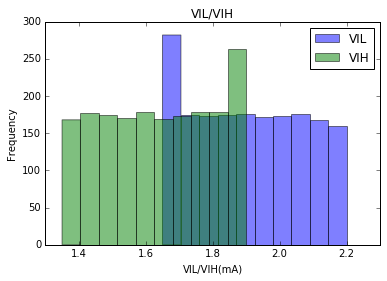

In [190]:
vol_plt = df[(df.Test == 'VIH') ].Data0.plot(kind='hist', alpha=0.5, title='VIL/VIH')
vol_plt = vol_plt.set_xlabel('VIH(mA)')
# vol_plt = vol_plt.get_figure().savefig('VIH.png')

vol_plt = df[(df.Test == 'VIL') ].Data0.plot(kind='hist', alpha=0.5, title='VIL/VIH')
vol_plt.set_xlabel('VIL/VIH(mA)')
vol_plt.legend(['VIL', 'VIH'])
vol_plt = vol_plt.get_figure().savefig('VILH.png')

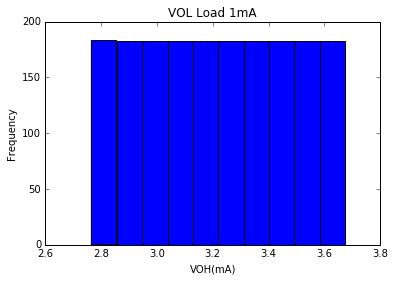

In [191]:
vol_plt = df[(df.Test == 'VOH') & (df.Data1 == '1mA')].Data0.plot(kind='hist', title='VOL Load 1mA')
vol_plt = vol_plt.set_xlabel('VOH(mA)')
vol_plt = vol_plt.get_figure().savefig('VOH1.png')

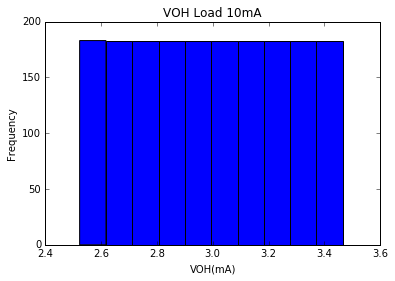

In [199]:
vol_plt = df[(df.Test == 'VOH') & (df.Data1 == '10mA')].Data0.plot(kind='hist', title='VOH Load 10mA')
vol_plt = vol_plt.set_xlabel('VOH(mA)')
vol_plt = vol_plt.get_figure().savefig('VOH10.png')

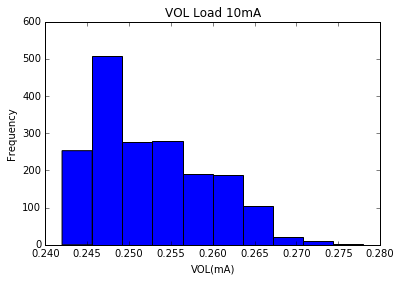

In [193]:
vol_plt = df[(df.Test == 'VOL') & (df.Data1 == '10mA')].Data0.plot(kind='hist', title='VOL Load 10mA')
vol_plt = vol_plt.set_xlabel('VOL(mA)')
vol_plt = vol_plt.get_figure().savefig('VOL10.png')

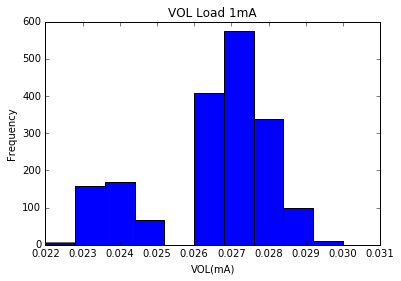

In [194]:
vol_plt = df[(df.Test == 'VOL') & (df.Data1 == '1mA')].Data0.plot(kind='hist', title='VOL Load 1mA')
vol_plt = vol_plt.set_xlabel('VOL(mA)')
vol_plt = vol_plt.get_figure().savefig('VOL1.png')

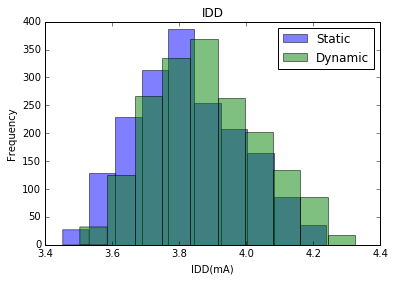

In [198]:
idd_plot = df[(df.Test == 'IDD') & (df.Data1 == 'STATIC')].Data0.plot(kind='hist',alpha=0.5, title='IDD Static', legend=True)
idd_plot.set_xlabel('IDD(mA)')
idd_plot.legend('S')
# idd_plot.get_figure().savefig('IDDStatic.png')

idd_plot = df[(df.Test == 'IDD') & (df.Data1 == 'DYNAMIC')].Data0.plot(kind='hist',alpha=0.5, title='IDD', legend=True)
idd_plot.set_xlabel('IDD(mA)')
idd_plot.legend(['Static', 'Dynamic'])
idd_plot.get_figure().savefig('IDD.png')

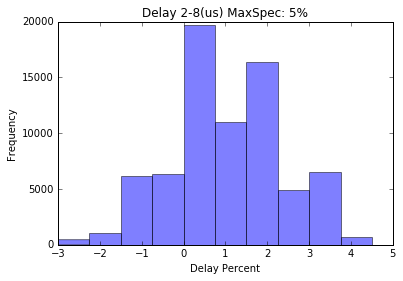

In [196]:
plt_range1 = df_dly[df_dly['Data1'] < 8000]['Dly'].plot(kind='hist', alpha=0.5, title='Delay 2-8(us) MaxSpec: 5%')
plt_range1.set_xlabel("Delay Percent")
plt_range1.set_ylabel("Frequency")
plt_range1.get_figure().savefig('dly_5p.png')

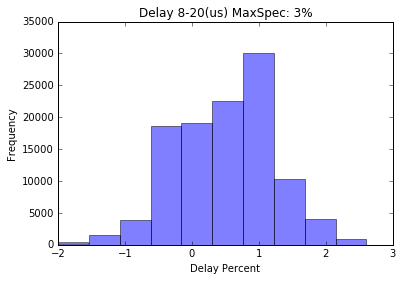

In [197]:
plt_range2 = df_dly[df_dly['Data1'] >= 8000]['Dly'].plot(kind='hist', alpha=0.5, title='Delay 8-20(us) MaxSpec: 3%')
plt_range2.set_xlabel("Delay Percent")
plt_range2.set_ylabel("Frequency")
plt_range2.get_figure().savefig('dly_3p.png')

In [60]:
VOL1_sum = df[(df.Test == 'VOL') & (df.Data1 == '1mA')].Data0.describe()
VOL10_sum = df[(df.Test == 'VOL') & (df.Data1 == '10mA')].Data0.describe()
VOH1_sum = df[(df.Test == 'VOH') & (df.Data1 == '1mA')].Data0.describe()
VOH10_sum = df[(df.Test == 'VOH') & (df.Data1 == '10mA')].Data0.describe()
VIH_sum = df[(df.Test == 'VIH')].Data0.describe()
VIL_sum = df[(df.Test == 'VIL')].Data0.describe()
IDD_sum = df[(df.Test == 'IDD') & (df.Data1 == 'STATIC')].Data0.describe()
IDD_sum2 = df[(df.Test == 'IDD') & (df.Data1 == 'DYNAMIC')].Data0.describe()
Dly1_sum = df_dly[df_dly['Data1'] < 8000]['Dly'].describe()
Dly2_sum = df_dly[df_dly['Data1'] >= 8000].Dly.describe()
sum_col = ['VOL_Iload=1mA', 'VOL_Iload=10mA', 'VOH_Iload=1mA', 'VOH_Iload=10mA', 'VIH', "VIL", 'IDD', 'IDD D', 'Delay=2~8uS', 'Delay=8~20uS']

In [61]:
summary_table = pd.concat([VOL1_sum, VOL10_sum, VOH1_sum, VOH10_sum, VIH_sum, VIL_sum, IDD_sum, IDD_sum2, Dly1_sum, Dly2_sum], axis=1)
summary_table.columns = sum_col

In [62]:
df[(df.Test == 'IDD')]

,Lot,Temp,Dev#,VDD,Test,Data0,Data1,Dly
1070,RC01927M,25C,1,3.7,IDD,4.055,STATIC,NaN
1071,RC01927M,25C,1,3.7,IDD,4.060,DYNAMIC,NaN
1072,RC01927M,25C,1,3.6,IDD,3.989,STATIC,NaN
1073,RC01927M,25C,1,3.6,IDD,4.101,DYNAMIC,NaN
1074,RC01927M,25C,1,3.5,IDD,3.994,STATIC,NaN
1075,RC01927M,25C,1,3.5,IDD,4.101,DYNAMIC,NaN
1076,RC01927M,25C,1,3.4,IDD,3.994,STATIC,NaN
1077,RC01927M,25C,1,3.4,IDD,4.071,DYNAMIC,NaN
1078,RC01927M,25C,1,3.3,IDD,4.030,STATIC,NaN
1079,RC01927M,25C,1,3.3,IDD,4.106,DYNAMIC,NaN


In [63]:
# print(summary_table.to_html().replace('<table border="1" class="dataframe">', '<table class="table table-striped">'))

In [64]:
summary_table.to_csv('summarytable.csv')

In [65]:
# html_string = " \
# <html>
#     <head>
#         <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.1/css/bootstrap.min.css">
#         <style>body{ margin:0 100; background:whitesmoke; }</style>
#     </head>
#     <body>
#         <h1>6P80038 qualification characterazition report
#         <h1>    Lot RC01927M RC01928M RC01929M</h1>
#         <h2>Characterization Statistics Table</h3>
#         + summary_table +"
#     </body>
# </html>"

In [118]:
df.to_csv('raw_data.csv')